# DSM (CSM) -> Harsha Pallam

In [45]:
using LinearAlgebra

### Declaring Material properties

In [46]:
EA1 = 21000000;
EA2 = 10000000;

EA = [EA1, EA1, EA1, EA1, EA2];     # Extensional_stiffness
L = [60, 60, sqrt(45^2 + 15^2), sqrt(45^2 + 15^2), sqrt(2)*45];     # truss_lengths
α = [-π/2, 0, -atan(45/15), -atan(15/45), π/4]     #Angles

5-element Vector{Float64}:
 -1.5707963267948966
  0.0
 -1.2490457723982544
 -0.3217505543966422
  0.7853981633974483

### Problem Data

In [47]:
n_ele = 5       #number of elements in the system
ID_t = [[1 2 3 4]; [3 4 7 8]; [5 6 7 8]; [1 2 5 6]; [3 4 5 6]]      # Merging DOF from each element together
ID = transpose(ID_t)        #ID matrix of the system

4×5 transpose(::Matrix{Int64}) with eltype Int64:
 1  3  5  1  3
 2  4  6  2  4
 3  7  7  5  5
 4  8  8  6  6

### Element Stiffness Matrices

In [48]:
K_bar = []  # This array stores all element-bar stiffness matrices
Q = []  # This array stores all elements rotation matrices
k = [[1 0 -1 0]; [0 0 0 0]; [-1 0 1 0]; [0 0 0 0]]      # stiffness matrices

for i in 1:n_ele
    k_bar = (EA[i] / L[i]) * k
    c = cos(α[i])
    s = sin(α[i])
    q = [[c -s 0 0]; [s c 0 0]; [0 0 c -s]; [0 0 s c]]
    push!(K_bar, k_bar)
    push!(Q, q)
end
#Q[2]
#K_bar[2]

In [49]:
K_e = []  # This array stores all elements stiffness matrices

for i in 1:n_ele
    K_i = Q[i] * K_bar[i] * transpose(Q[i])
    push!(K_e, K_i)
end
K_e[2]

4×4 Matrix{Float64}:
  350000.0  0.0  -350000.0  0.0
       0.0  0.0        0.0  0.0
 -350000.0  0.0   350000.0  0.0
       0.0  0.0        0.0  0.0

### Assembly

In [50]:
K = zeros(8, 8)  # Creates an 8x8 matrix filled with zeros

#Inserting Elements into Global Matrix
for e in 1:n_ele
    for i in 1:4
        for j in 1:4
            K[ID[i, e], ID[j, e]] = K[ID[i, e], ID[j, e]] + K_e[e][i, j]
        end
    end
end
K

8×8 Matrix{Float64}:
  398447.0               -1.32816e5    …        0.0              0.0
      -1.32816e5          3.94272e5             0.0              0.0
      -1.31229e-27        2.14313e-11     -350000.0              0.0
       2.14313e-11  -350000.0                   0.0              0.0
 -398447.0                1.32816e5        -44271.9              1.32816e5
       1.32816e5     -44271.9          …        1.32816e5  -398447.0
       0.0                0.0                   3.94272e5       -1.32816e5
       0.0                0.0                  -1.32816e5   398447.0

In [51]:
# Compute eigenvalues and eigenvectors
eig_result = eigen(K)

# Extract eigenvalues and eigenvectors from the result
eigvals = eig_result.values  # Eigenvalues
eigvecs_matrix = eig_result.vectors  # Eigenvectors (matrix)

# Display the results
println("Eigenvalues of K:")
println(eigvals)

println("Eigenvectors of K:")
println(eigvecs_matrix)

Eigenvalues of K:
ComplexF64[-4.821488732429417e-11 + 0.0im, 3.1627726547248506e-11 - 1.7672360492848837e-11im, 3.1627726547248506e-11 + 1.7672360492848837e-11im, 178879.806124921 + 0.0im, 529145.0374341672 + 0.0im, 667928.2713592026 + 0.0im, 926051.2583612695 + 0.0im, 1.1831407969420874e6 + 0.0im]
Eigenvectors of K:
ComplexF64[-0.5223025086320173 + 0.0im 0.18512645346807025 + 0.17776351928096804im 0.18512645346807025 - 0.17776351928096804im -0.25730411597009456 + 0.0im 0.4983656668265534 + 0.0im 0.13626155462568584 + 0.0im 0.24581752181927974 + 0.0im -0.39737057888863114 + 0.0im; 0.1576565679442509 + 0.0im 0.25042608458535603 + 0.265743156880232im 0.25042608458535603 - 0.265743156880232im 0.43093030015067463 + 0.0im 0.16934857401510472 + 0.0im 0.45025533235268544 + 0.0im -0.4007744214531407 + 0.0im 0.2284121198016571 + 0.0im; -0.3688670854748094 + 0.0im 0.35903178288874527 - 0.08797963759926407im 0.35903178288874527 + 0.08797963759926407im 0.25452299038586995 + 0.0im -0.33783008506944

### Master Stiffness Equation

#### Introducing BC;
##### D1 = D2 = D3 = 0

In [52]:
K_red = K[4:8, 4:8]
F_red = [0, 0, 0, 0, 200]  # Reduced force vector
D_red = K_red \ F_red  # Solve linear system

5-element Vector{Float64}:
 0.00038095238095238107
 0.0001430405377395025
 0.0019349681180605937
 0.00019047619047619032
 0.002452728837253518

### Support Reactions

In [53]:
D = vcat(zeros(3), D_red)

8-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.00038095238095238107
 0.0001430405377395025
 0.0019349681180605937
 0.00019047619047619032
 0.002452728837253518

In [54]:
F = K * D

8-element Vector{Float64}:
  200.0000000000001
 -200.00000000000006
 -200.0
    0.0
   -7.105427357601002e-15
   -3.907985046680551e-14
   -8.526512829121202e-14
  200.00000000000009

### Recovery of member forces

In [55]:
d_e = []

for i in 1:n_ele
    d_i = D[ID[1,i]],D[ID[2,i]],D[ID[3,i]],D[ID[4,i]]
    push!(d_e, d_i)
end
d_e

5-element Vector{Any}:
 (0.0, 0.0, 0.0, 0.00038095238095238107)
 (0.0, 0.00038095238095238107, 0.00019047619047619032, 0.002452728837253518)
 (0.0001430405377395025, 0.0019349681180605937, 0.00019047619047619032, 0.002452728837253518)
 (0.0, 0.0, 0.0001430405377395025, 0.0019349681180605937)
 (0.0, 0.00038095238095238107, 0.0001430405377395025, 0.0019349681180605937)

In [56]:
d_bar = []  # Initialize empty array to store results

for i in 1:n_ele
    d_e_vector = collect(d_e[i])  # Convert NTuple{4, Float64} to Vector{Float64}
    d_bar_i = transpose(Q[i]) * d_e_vector   # Now multiply matrix with vector
    push!(d_bar, d_bar_i)         # Store the result
end
d_bar

5-element Vector{Any}:
 [0.0, 0.0, -0.00038095238095238107, 2.332660569804483e-20]
 [0.0, 0.00038095238095238107, 0.00019047619047619032, 0.002452728837253518]
 [-0.0017904385461651098, 0.0007475908143857368, -0.002266629022355586, 0.0009563225414308066]
 [0.0, 0.0, -0.0004761904761904764, 0.0018809053255635301]
 [0.00026937401188058957, 0.0002693740118805896, 0.0014693740118805901, 0.0012670841434402455]

In [57]:
# Member Forces
N = []
for i in 1:n_ele
    N_i = (EA[i] * (d_bar[i][3] - d_bar[i][1])) / L[i]
    push!(N, N_i)
end
N

5-element Vector{Any}:
 -133.33333333333337
   66.66666666666661
 -210.81851067789205
 -210.81851067789205
  188.56180831641277

┌ Warning: Unused font kwarg: fontweight
└ @ Plots /home/hp/.julia/packages/Plots/kLeqV/src/components.jl:303
┌ Warning: Unused font kwarg: fontweight
└ @ Plots /home/hp/.julia/packages/Plots/kLeqV/src/components.jl:303
┌ Warning: Unused font kwarg: fontweight
└ @ Plots /home/hp/.julia/packages/Plots/kLeqV/src/components.jl:303
┌ Warning: Unused font kwarg: fontweight
└ @ Plots /home/hp/.julia/packages/Plots/kLeqV/src/components.jl:303


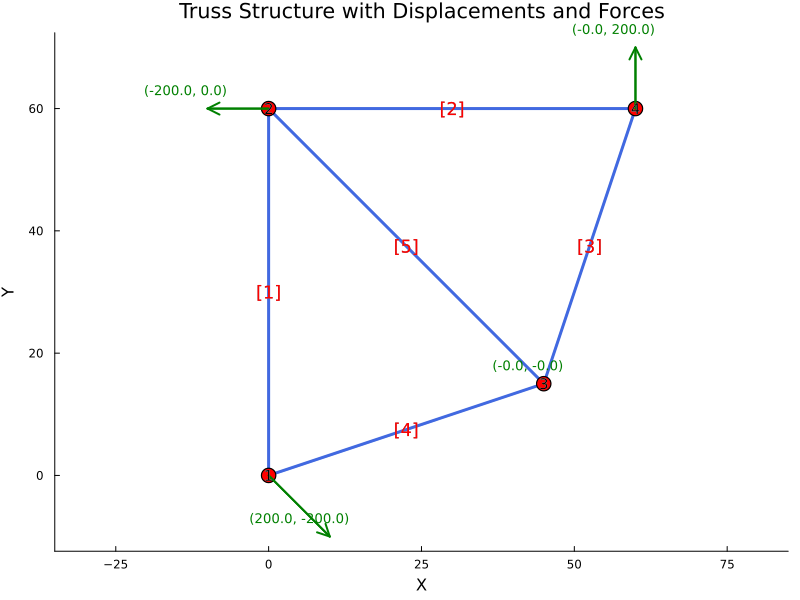

In [66]:
using Plots
# Define original node coordinates
nodes = [
    (0, 0);       # Node 1
    (0, 60);      # Node 2
    (45, 15);     # Node 3
    (60, 60)      # Node 4
]

# Define connections (pairs of node indices)
members = [
    (1, 2);       # Member 1
    (2, 4);       # Member 2
    (4, 3);       # Member 3
    (3, 1);       # Member 4
    (2, 3)        # Member 5
]

# Apply displacement to the node coordinates
D = D

# Force vector F = [F_x1, F_y1, F_x2, F_y2, ..., F_xn, F_yn]
F = F

# Apply displacements to the node coordinates
new_nodes = [
    (nodes[1][1] + D[1], nodes[1][2] + D[2]),  # Updated Node 1
    (nodes[2][1] + D[3], nodes[2][2] + D[4]),  # Updated Node 2
    (nodes[3][1] + D[5], nodes[3][2] + D[6]),  # Updated Node 3
    (nodes[4][1] + D[7], nodes[4][2] + D[8])   # Updated Node 4
]

# Initialize the plot object with the legend set to false
p = plot(
    title = "Truss Structure with Displacements and Forces", 
    aspect_ratio = 1, 
    legend = true,  # Enable the legend
    lw = 2, 
    background_color = :white, 
    grid = false,
    xlabel = "X", 
    ylabel = "Y",
    size = (800, 600),
    fontsize = 14
)

# Plot original members (lines connecting the original nodes) in light gray
for (idx, member) in enumerate(members)
    x_coords = [nodes[member[1]][1], nodes[member[2]][1]]
    y_coords = [nodes[member[1]][2], nodes[member[2]][2]]

    # Plot the original member as a light gray line with no label for legend
    plot!(p, x_coords, y_coords, color = RGBA(0.7, 0.7, 0.7, 1), lw = 2, label = "")
    
    # Annotate the member with index
    mid_x = (x_coords[1] + x_coords[2]) / 2
    mid_y = (y_coords[1] + y_coords[2]) / 2
    annotate!(p, mid_x, mid_y, text("[$idx]", :center, 12, color = :gray))
end

# Plot deformed members (lines connecting the updated nodes) with blue color
for (idx, member) in enumerate(members)
    x_coords = [new_nodes[member[1]][1], new_nodes[member[2]][1]]
    y_coords = [new_nodes[member[1]][2], new_nodes[member[2]][2]]

    # Plot the deformed member as a blue line with no label for legend
    plot!(p, x_coords, y_coords, color = :royalblue, lw = 3, label = "")

    # Annotate the member with index in red
    mid_x = (x_coords[1] + x_coords[2]) / 2
    mid_y = (y_coords[1] + y_coords[2]) / 2
    annotate!(p, mid_x, mid_y, text("[$idx]", :center, 12, color = :red))
end

# Plot original nodes with black markers and annotations inside hollow circles
for (i, node) in enumerate(nodes)
    scatter!(p, [node[1]], [node[2]], color = :black, marker = :circle, markersize = 8, label = "")
    annotate!(p, node[1], node[2], text("$i", :center, 10, color = :white))
end

# Plot updated nodes (after displacement) with red color and annotations inside hollow circles
for (i, node) in enumerate(new_nodes)
    scatter!(p, [node[1]], [node[2]], color = :red, marker = :circle, markersize = 8, label = "")
    annotate!(p, node[1], node[2], text("$i", :center, 10, color = :black))
end

# Plot the forces as arrows (with label for legend)
force_scale = 0.05  # Scale factor to adjust the size of the forces

for i in 1:length(nodes)
    Fx = F[2*i - 1] * force_scale  # Force in the X direction (scaled)
    Fy = F[2*i] * force_scale      # Force in the Y direction (scaled)

    # Draw the force as an arrow at each node (scaled for visibility)
    quiver!(p, [new_nodes[i][1]], [new_nodes[i][2]], quiver = [(Fx, Fy)], color = :green, linewidth = 2, label = "Forces")

    # Annotate the real force values (without scaling) at each node
    real_Fx = round(F[2*i - 1], digits = 12)  # Round force in the X direction to 2 decimal places
    real_Fy = round(F[2*i], digits = 12)      # Round force in the Y direction to 2 decimal places


    annotate!(p, new_nodes[i][1] + Fx + 3, new_nodes[i][2] + Fy + 3, 
          text("($real_Fx, $real_Fy)", :right, 9, color = :green, fontweight = :bold))

end

# Display the plot
display(p)
